In [3]:
#importing useful packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools 
import sympy as sym
from itertools import islice
import matplotlib.ticker as tick
from scipy.integrate import cumtrapz
import math as m

In [4]:
# Getting vehicle data
vehdata = pd.read_csv("VehicleSpec.csv")

# Name vehdata as cardata 
cardata = vehdata
cardata

,Model,Vehicle,CD,CR,Curb Weight,Test weight,Rated Power,Rated Torque,MaxSpeed,Acceleration,A,B,C,Gear ratio,Wheel Radius
0,GM EV1,BEV,0.19,NaN,1400,0,100,150,129,8.5,NaN,NaN,NaN,10,r
1,Nissan Leaf,BEV,0.28,0.0083,1477,1645,80,254,144,11.5,133.3,0.7094,0.491,8.19,0.315
2,Tesla Model S,BEV,0.24,0.0084,2100,2155,270,440,224,5.4,177.2,1.4450,0.354,9.73,0.352
3,Toyota Prius,HEV,0.25,0.0055,1365,1531,73,,180,10.4,82.3,0.2220,0.403,CVT,0.313
4,Lexus RX450h,HEV,0.33,0.0064,2091,2268,183,,180,7.7,141.8,3.2730,0.569,CVT,0.37
5,Chevy Volt,PHEV,0.28,0.0065,1720,1814,111,,160,9.2,115.9,-0.1190,0.405,CVT,0.334
6,Toyota Mirai,FCEV,0.29,0.0076,1850,1928,113,335,335,9.6,143.8,1.9900,0.407,NaN,0.334


In [5]:
# Read WLTC3 drive cycle data
WLTC3 = pd.read_csv('WLTC3.csv',header = 0, skiprows = 1)
WLTC3.head()

#index
#col 0: WLTP driving cycle is divided into four parts with different average speeds: low, medium, high and extra high.
#col 1: total elapsed time [s]
#col 2: phase elapsed time [s]
#col 3: WLTC class 3, version 5, vehicle speed [km/h]
#col 4: WLTC class 3, version 5, acceleration [m/s²]
#col 5: WLTC class 3, version 5, acceleration [km/h/s] 

,Phase,s,s.1,km/h,m/s²,km/h/s
0,Low,0,0,0.0,0.0,0.0
1,Low,1,1,0.0,0.0,0.0
2,Low,2,2,0.0,0.0,0.0
3,Low,3,3,0.0,0.0,0.0
4,Low,4,4,0.0,0.0,0.0


In [6]:
# Assigning the values in WLTC to variables
td = WLTC3.iloc[:,1]
#print (td)
v3 = WLTC3.iloc[:,3]
#print(v3)
a3 = WLTC3.iloc[:,4]
#print (a3)


# Create velocity and acc profile 
td = np.array(WLTC3.iloc[:,1])
v3 = np.array(WLTC3.iloc[:,3])
a3 = np.array(WLTC3.iloc[:,4])

In [7]:
# Constant electrical load 
const_electrical_load = 1e3 # in kW 

# Function to find power
def Pv_eacc_const_load(A,B,C,gamma,m,v,acc):
    vx = v*(1000.0/3600.0)
    g = 9.81
    return (A + m*g*np.sin(gamma))*vx + B*vx**2 + C*vx**3 + 1.1*m*acc*v + const_electrical_load

In [8]:
# start of nissan leaf 

In [9]:
# gamma = 0 

In [10]:
# Create zero arrays aka space power with elevation + acc 
PP_nissan_0 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive 
    #cycles using Nissan leaf
    ppx_nissan_0 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],
                                      cardata.C[1],m.pi/180*0,
                                      cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_0[vi] = ppx_nissan_0

# Calculate the total energy of the drive cycle
ET_nissan_0 = cumtrapz(PP_nissan_0/1000, td, initial = 0) #To convert in kWh

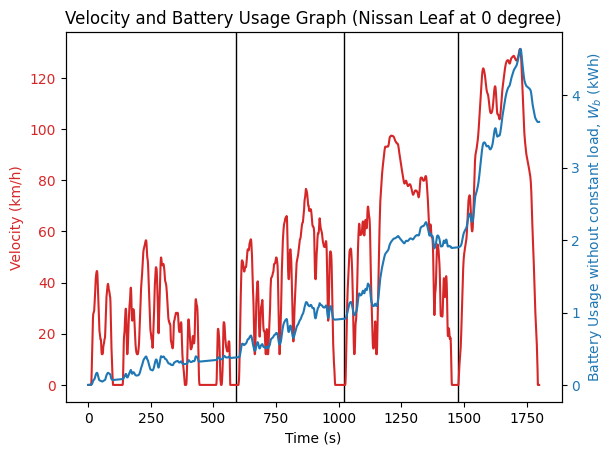

In [11]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_0)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 0 degree)')
plt.show()

In [12]:
# gamma = 5 

In [13]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_5 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_5 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*5,cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_5[vi] = ppx_nissan_5

# Calculate the total energy of the drive cycle
ET_nissan_5 = cumtrapz(PP_nissan_5/1000, td, initial = 0) #To convert in kWh

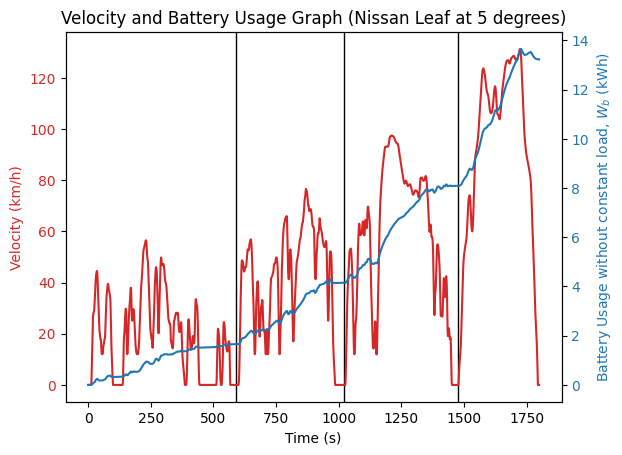

In [14]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_5)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 5 degrees)')
plt.show()

In [15]:
# gamma = 10

In [16]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_10 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_10 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*10,cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_10[vi] = ppx_nissan_10

# Calculate the total energy of the drive cycle
ET_nissan_10 = cumtrapz(PP_nissan_10/1000, td, initial = 0) #To convert in kWh

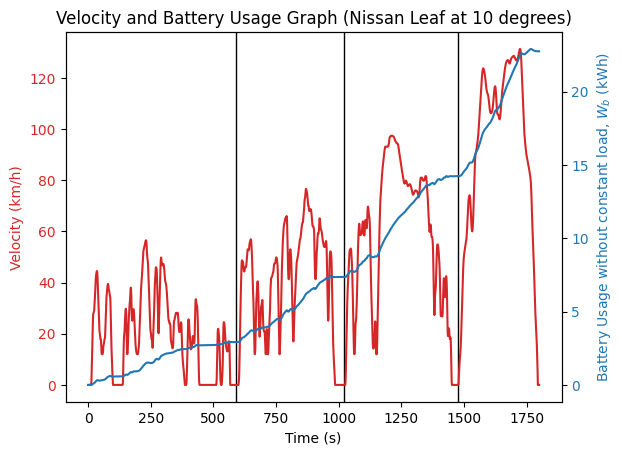

In [17]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_10)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 10 degrees)')
plt.show()

In [18]:
# gamma = 15 

In [19]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_15 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_15 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*15,cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_15[vi] = ppx_nissan_15

# Calculate the total energy of the drive cycle
ET_nissan_15 = cumtrapz(PP_nissan_15/1000, td, initial = 0) #To convert in kWh

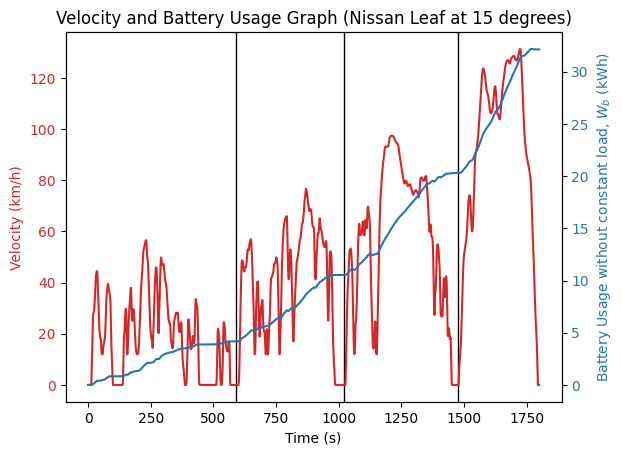

In [20]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_15)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 15 degrees)')
plt.show()

In [21]:
# gamma = 20 

In [22]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_20 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_20 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*20,cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_20[vi] = ppx_nissan_20

# Calculate the total energy of the drive cycle
ET_nissan_20 = cumtrapz(PP_nissan_20/1000, td, initial = 0) #To convert in kWh

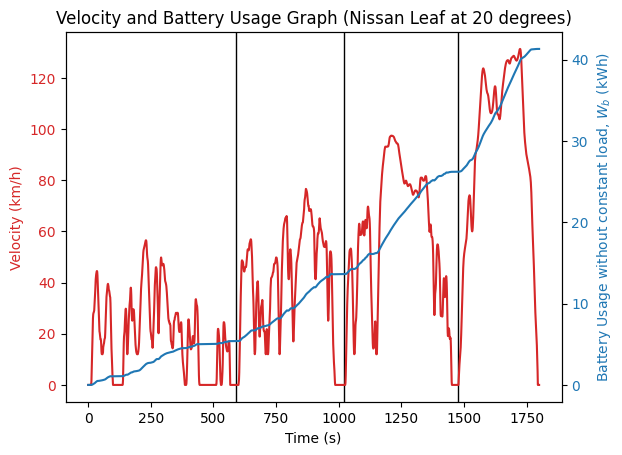

In [23]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_20)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 20 degrees)')
plt.show()

In [24]:
# gamma = 25 

In [25]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_25 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_25 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*25,cardata.iloc[1,4],v3[vi], a3[vi])
    PP_nissan_25[vi] = ppx_nissan_25

# Calculate the total energy of the drive cycle
ET_nissan_25 = cumtrapz(PP_nissan_25/1000, td, initial = 0) #To convert in kWh

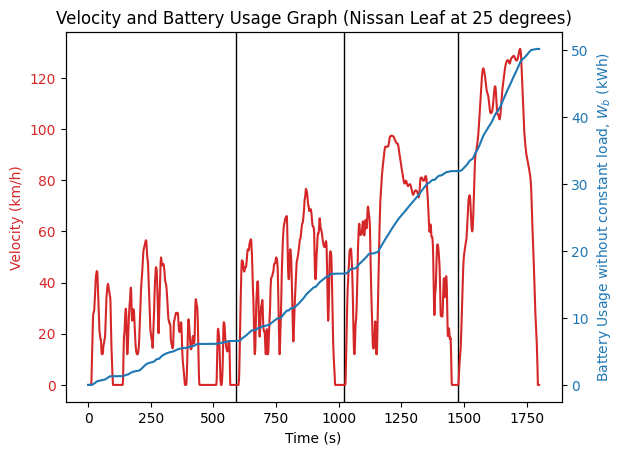

In [26]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_25)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 25 degrees)')
plt.show()

In [27]:
# gamma = 30

In [28]:
 # Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_30 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_30 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*30,cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_30[vi] = ppx_nissan_30

# Calculate the total energy of the drive cycle
ET_nissan_30 = cumtrapz(PP_nissan_30/1000, td, initial = 0) #To convert in kWh

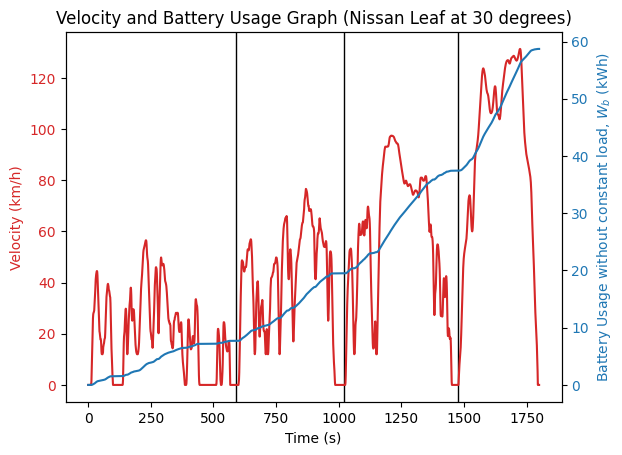

In [29]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_30)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 30 degrees)')
plt.show()

In [30]:
# gamma = 35

In [31]:
 # Create zero arrays aka space for traction force and power with elevation + acc 
PP_nissan_35 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_nissan_35 = Pv_eacc_const_load(cardata.A[1], cardata.B[1],cardata.C[1],m.pi/180*35,cardata.iloc[1,4], v3[vi], a3[vi])
    PP_nissan_35[vi] = ppx_nissan_35

# Calculate the total energy of the drive cycle
ET_nissan_35 = cumtrapz(PP_nissan_35/1000, td, initial = 0) #To convert in kWh

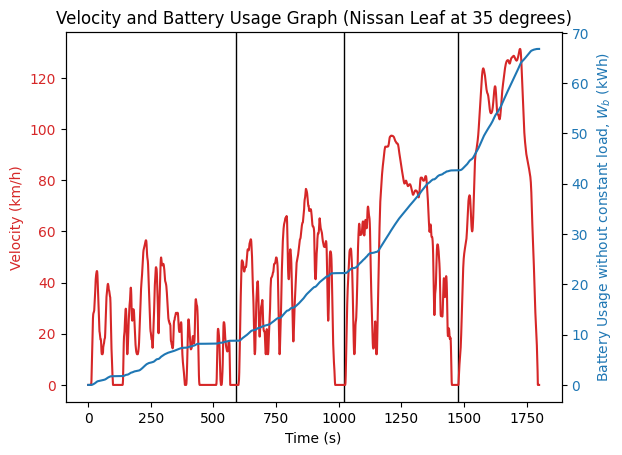

In [32]:
# Plotting the velocity and battery capacity graph
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_nissan_35)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Nissan Leaf at 35 degrees)')
plt.show()

In [33]:
#end of nissan leaf

In [34]:
#start of tesla s

In [35]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_0 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_0 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*0,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_0[vi] = ppx_tesla_0
    
# Calculate the total energy of the drive cycle
ET_tesla_0 = cumtrapz(PP_tesla_0/1000, td, initial = 0) #To convert in kWh

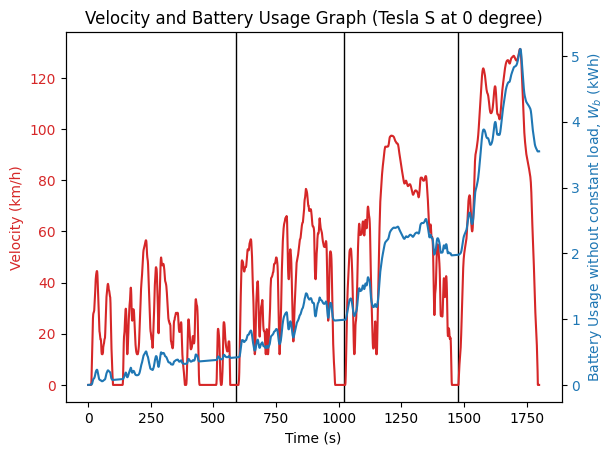

In [36]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_0)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 0 degree)')
plt.show()

In [37]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_5 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_5 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*5,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_5[vi] = ppx_tesla_5
    
# Calculate the total energy of the drive cycle
ET_tesla_5 = cumtrapz(PP_tesla_5/1000, td, initial = 0) #To convert in kWh

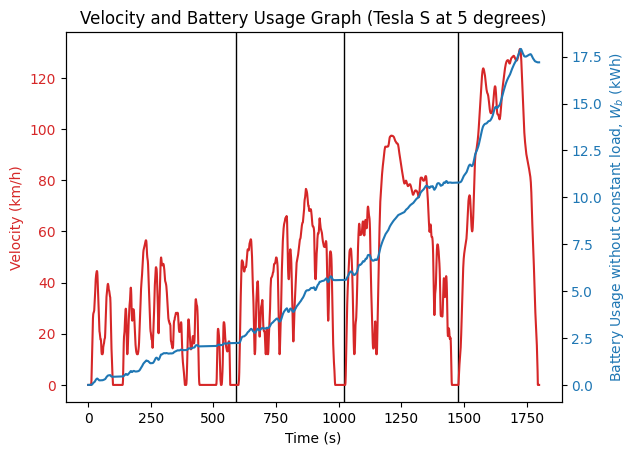

In [38]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_5)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 5 degrees)')
plt.show()

In [39]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_10 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_10 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*10,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_10[vi] = ppx_tesla_10
    
# Calculate the total energy of the drive cycle
ET_tesla_10 = cumtrapz(PP_tesla_10/1000, td, initial = 0) #To convert in kWh

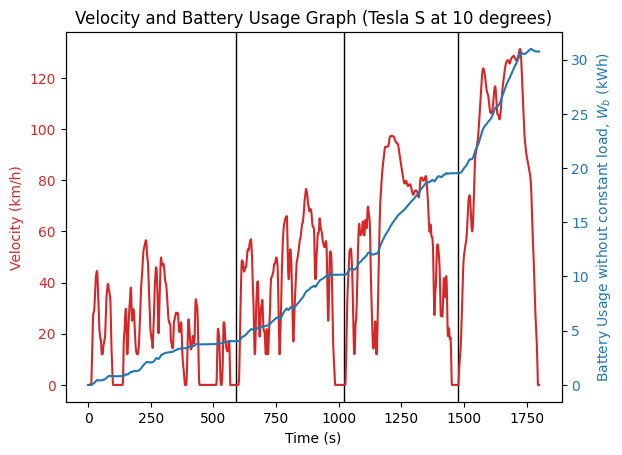

In [40]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_10)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 10 degrees)')
plt.show()

In [41]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_15 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_15 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*15,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_15[vi] = ppx_tesla_15
    
# Calculate the total energy of the drive cycle
ET_tesla_15 = cumtrapz(PP_tesla_15/1000, td, initial = 0) #To convert in kWh

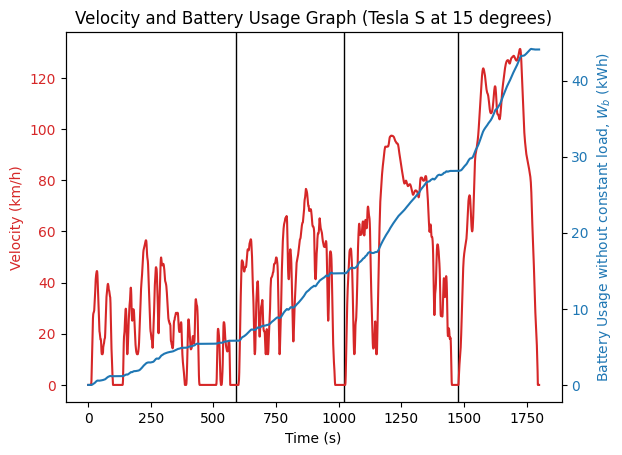

In [42]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_15)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 15 degrees)')
plt.show()

In [43]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_20 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_20 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*20,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_20[vi] = ppx_tesla_20
    
# Calculate the total energy of the drive cycle
ET_tesla_20 = cumtrapz(PP_tesla_20/1000, td, initial = 0) #To convert in kWh

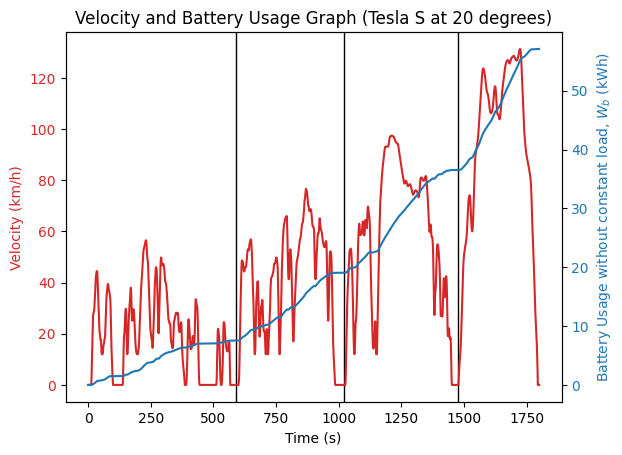

In [44]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_20)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 20 degrees)')
plt.show()

In [45]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_25 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_25 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*25,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_25[vi] = ppx_tesla_25
    
# Calculate the total energy of the drive cycle
ET_tesla_25 = cumtrapz(PP_tesla_25/1000, td, initial = 0) #To convert in kWh

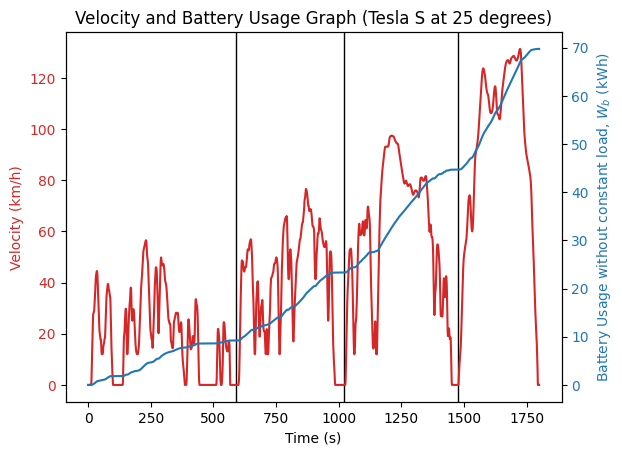

In [46]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_25)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 25 degrees)')
plt.show()

In [47]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_30 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_30 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*30,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_30[vi] = ppx_tesla_30
    
# Calculate the total energy of the drive cycle
ET_tesla_30 = cumtrapz(PP_tesla_30/1000, td, initial = 0) #To convert in kWh

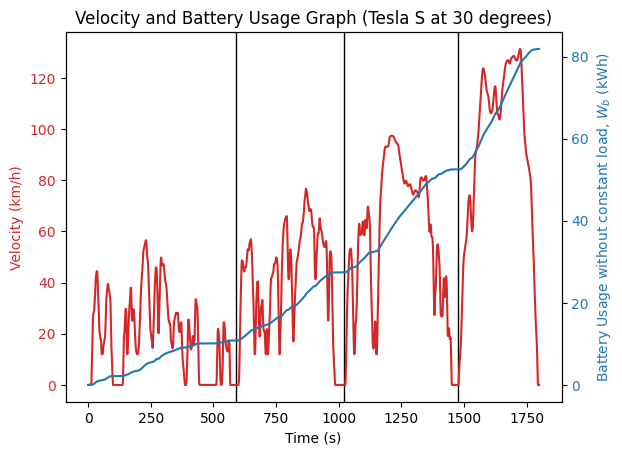

In [48]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_30)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 30 degrees)')
plt.show()

In [49]:
# Create zero arrays aka space for traction force and power with elevation + acc 
PP_tesla_35 = np.zeros(len(v3))

# Loop each velocity value in the drive cycle 
for vi in range(len(v3)):
    #Calculates the power + constant load required for the WLTC3 drive cycles using Nissan leaf
    ppx_tesla_35 = Pv_eacc_const_load(cardata.A[2], cardata.B[2],cardata.C[2],m.pi/180*35,cardata.iloc[2,4],v3[vi],a3[vi])
    PP_tesla_35[vi] = ppx_tesla_35
    
# Calculate the total energy of the drive cycle
ET_tesla_35 = cumtrapz(PP_tesla_35/1000, td, initial = 0) #To convert in kWh

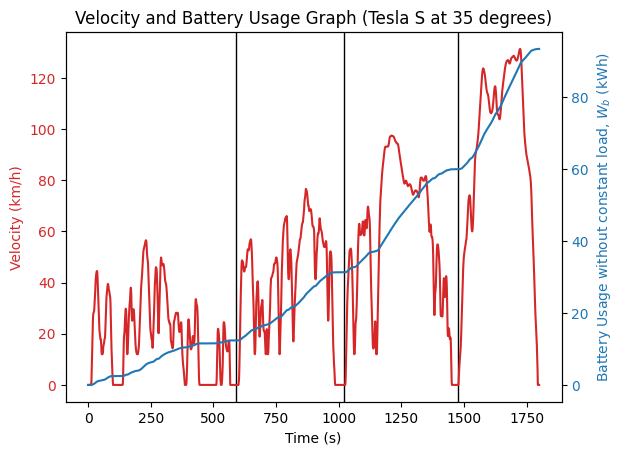

In [50]:
# Plotting the velocity and battery capacity graph (eacc w load)
fig, ax1 = plt.subplots()
color = 'tab:red'

# Set the x and y limits of the plot
#ax1.set_xlim([240, 280])
#ax1.set_ylim([0, 140])

# Divide the graph into 4 phases based on the WLTC3 drive cycle 
# End of low phase 
plt.axvline(589, c = 'k', lw =1)
# End of middle phase 
plt.axvline(1022, c = 'k', lw =1)
# End of high phase 
plt.axvline(1477, c = 'k', lw =1)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (km/h)', color=color)
ax1.plot(td, v3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Battery Usage without constant load, $W_b$ (kWh)', color=color)
ax2.plot(td,(ET_tesla_35)/(3600*0.85), color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Velocity and Battery Usage Graph (Tesla S at 35 degrees)')
plt.show()

In [51]:
#end of tesla 

In [54]:
print ('Nissan Leaf Model Energy Needed At The Phase 1')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[589])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_5[589])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_10[589])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_15[589])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_20[589])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_25[589])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_30[589])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_35[589])/(3600*0.85)))

Nissan Leaf Model Energy Needed At The Phase 1
At 0 degree elevation: 0.38[kWh]
At 5 degrees elevation: 1.66[kWh]
At 10 degrees elevation: 2.92[kWh]
At 15 degrees elevation: 4.17[kWh]
At 20 degrees elevation: 5.39[kWh]
At 25 degrees elevation: 6.57[kWh]
At 30 degrees elevation: 7.71[kWh]
At 35 degrees elevation: 8.78[kWh]


In [55]:
print ('Tesla S Model Energy Needed At The End Phase 1')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[589])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_5[589])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_10[589])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_15[589])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_20[589])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_25[589])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_30[589])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_35[589])/(3600*0.85)))

Tesla S Model Energy Needed At The End Phase 1
At 0 degree elevation: 0.42[kWh]
At 5 degrees elevation: 2.23[kWh]
At 10 degrees elevation: 4.03[kWh]
At 15 degrees elevation: 5.81[kWh]
At 20 degrees elevation: 7.54[kWh]
At 25 degrees elevation: 9.22[kWh]
At 30 degrees elevation: 10.83[kWh]
At 35 degrees elevation: 12.37[kWh]


In [56]:
print ('Nissan Leaf Model Energy Needed At The of End Phase 2')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[1022])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_5[1022])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_10[1022])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_15[1022])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_20[1022])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_25[1022])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_30[1022])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_35[1022])/(3600*0.85)))

Nissan Leaf Model Energy Needed At The of End Phase 2
At 0 degree elevation: 0.91[kWh]
At 5 degrees elevation: 4.15[kWh]
At 10 degrees elevation: 7.37[kWh]
At 15 degrees elevation: 10.53[kWh]
At 20 degrees elevation: 13.63[kWh]
At 25 degrees elevation: 16.62[kWh]
At 30 degrees elevation: 19.50[kWh]
At 35 degrees elevation: 22.23[kWh]


In [57]:
print ('Tesla S Model Energy Needed At The End of Phase 2')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[1022])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_5[1022])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_10[1022])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_15[1022])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_20[1022])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_25[1022])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_30[1022])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_35[1022])/(3600*0.85)))

Tesla S Model Energy Needed At The End of Phase 2
At 0 degree elevation: 0.99[kWh]
At 5 degrees elevation: 5.60[kWh]
At 10 degrees elevation: 10.17[kWh]
At 15 degrees elevation: 14.67[kWh]
At 20 degrees elevation: 19.07[kWh]
At 25 degrees elevation: 23.33[kWh]
At 30 degrees elevation: 27.42[kWh]
At 35 degrees elevation: 31.30[kWh]


In [58]:
print ('Nissan Leaf Model Energy Needed At The of End Phase 3')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[1477])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_5[1477])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_10[1477])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_15[1477])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_20[1477])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_25[1477])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_30[1477])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_35[1477])/(3600*0.85)))

Nissan Leaf Model Energy Needed At The of End Phase 3
At 0 degree elevation: 1.90[kWh]
At 5 degrees elevation: 8.09[kWh]
At 10 degrees elevation: 14.24[kWh]
At 15 degrees elevation: 20.29[kWh]
At 20 degrees elevation: 26.21[kWh]
At 25 degrees elevation: 31.93[kWh]
At 30 degrees elevation: 37.43[kWh]
At 35 degrees elevation: 42.66[kWh]


In [59]:
print ('Tesla S Model Energy Needed At The End of Phase 3')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[1477])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_5[1477])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_10[1477])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_15[1477])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_20[1477])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_25[1477])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_30[1477])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_35[1477])/(3600*0.85)))

Tesla S Model Energy Needed At The End of Phase 3
At 0 degree elevation: 1.98[kWh]
At 5 degrees elevation: 10.78[kWh]
At 10 degrees elevation: 19.52[kWh]
At 15 degrees elevation: 28.13[kWh]
At 20 degrees elevation: 36.54[kWh]
At 25 degrees elevation: 44.68[kWh]
At 30 degrees elevation: 52.50[kWh]
At 35 degrees elevation: 59.93[kWh]


In [60]:
print ('Nissan Leaf Model Energy Needed At The End Of Phase 4')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[-1])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_5[-1])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_10[-1])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_15[-1])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_20[-1])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_25[-1])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_30[-1])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_nissan_35[-1])/(3600*0.85)))

Nissan Leaf Model Energy Needed At The End Of Phase 4
At 0 degree elevation: 3.63[kWh]
At 5 degrees elevation: 13.23[kWh]
At 10 degrees elevation: 22.76[kWh]
At 15 degrees elevation: 32.14[kWh]
At 20 degrees elevation: 41.31[kWh]
At 25 degrees elevation: 50.18[kWh]
At 30 degrees elevation: 58.71[kWh]
At 35 degrees elevation: 66.81[kWh]


In [61]:
print ('Tesla S Model Energy Needed At The End Of Phase 4')
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[-1])/(3600*0.85)))
print ("At 5 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_5[-1])/(3600*0.85)))
print ("At 10 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_10[-1])/(3600*0.85)))
print ("At 15 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_15[-1])/(3600*0.85)))
print ("At 20 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_20[-1])/(3600*0.85)))
print ("At 25 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_25[-1])/(3600*0.85)))
print ("At 30 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_30[-1])/(3600*0.85)))
print ("At 35 degrees elevation: {0:3.2f}[kWh]".format((ET_tesla_35[-1])/(3600*0.85)))

Tesla S Model Energy Needed At The End Of Phase 4
At 0 degree elevation: 3.55[kWh]
At 5 degrees elevation: 17.20[kWh]
At 10 degrees elevation: 30.74[kWh]
At 15 degrees elevation: 44.08[kWh]
At 20 degrees elevation: 57.11[kWh]
At 25 degrees elevation: 69.74[kWh]
At 30 degrees elevation: 81.85[kWh]
At 35 degrees elevation: 93.38[kWh]


In [147]:
print ("Nissan Model Gradient at Low Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[589]-ET_nissan_0[0])/589))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_5[589]-ET_nissan_5[0])/589))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_10[589]-ET_nissan_10[0])/589))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_15[589]-ET_nissan_15[0])/589))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_20[589]-ET_nissan_20[0])/589))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_25[589]-ET_nissan_25[0])/589))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_30[589]-ET_nissan_30[0])/589))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_35[589]-ET_nissan_35[0])/589))


Nissan Model Gradient at Low Phase
At 0 degree elevation: 1.97[kWh]
At 5 degree elevation: 8.60[kWh]
At 10 degree elevation: 15.19[kWh]
At 15 degree elevation: 21.67[kWh]
At 20 degree elevation: 28.00[kWh]
At 25 degree elevation: 34.14[kWh]
At 30 degree elevation: 40.03[kWh]
At 35 degree elevation: 45.63[kWh]


In [148]:
print ("Tesla Model S Model Gradient at Low Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[589]-ET_tesla_0[0])/589))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_5[589]-ET_tesla_5[0])/589))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_10[589]-ET_tesla_10[0])/589))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_15[589]-ET_tesla_15[0])/589))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_20[589]-ET_tesla_20[0])/589))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_25[589]-ET_tesla_25[0])/589))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_30[589]-ET_tesla_30[0])/589))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_35[589]-ET_tesla_35[0])/589))

Tesla Model S Model Gradient at Low Phase
At 0 degree elevation: 2.17[kWh]
At 5 degree elevation: 11.60[kWh]
At 10 degree elevation: 20.96[kWh]
At 15 degree elevation: 30.18[kWh]
At 20 degree elevation: 39.19[kWh]
At 25 degree elevation: 47.91[kWh]
At 30 degree elevation: 56.28[kWh]
At 35 degree elevation: 64.25[kWh]


In [149]:
print ("Nissan Model Gradient at Medium Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[1022]-ET_nissan_0[589])/(1022-589)))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_5[1022]-ET_nissan_5[589])/(1022-589)))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_10[1022]-ET_nissan_10[589])/(1022-589)))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_15[1022]-ET_nissan_15[589])/(1022-589)))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_20[1022]-ET_nissan_20[589])/(1022-589)))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_25[1022]-ET_nissan_25[589])/(1022-589)))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_30[1022]-ET_nissan_30[589])/(1022-589)))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_35[1022]-ET_nissan_35[589])/(1022-589)))

Nissan Model Gradient at Medium Phase
At 0 degree elevation: 3.78[kWh]
At 5 degree elevation: 17.65[kWh]
At 10 degree elevation: 31.41[kWh]
At 15 degree elevation: 44.97[kWh]
At 20 degree elevation: 58.21[kWh]
At 25 degree elevation: 71.03[kWh]
At 30 degree elevation: 83.35[kWh]
At 35 degree elevation: 95.06[kWh]


In [150]:
print ("Tesla Model S Model Gradient at Medium Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[1022]-ET_tesla_0[589])/(1022-589)))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_5[1022]-ET_tesla_5[589])/(1022-589)))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_10[1022]-ET_tesla_10[589])/(1022-589)))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_15[1022]-ET_tesla_15[589])/(1022-589)))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_20[1022]-ET_tesla_20[589])/(1022-589)))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_25[1022]-ET_tesla_25[589])/(1022-589)))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_30[1022]-ET_tesla_30[589])/(1022-589)))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_35[1022]-ET_tesla_35[589])/(1022-589)))

Tesla Model S Model Gradient at Medium Phase
At 0 degree elevation: 4.05[kWh]
At 5 degree elevation: 23.77[kWh]
At 10 degree elevation: 43.34[kWh]
At 15 degree elevation: 62.61[kWh]
At 20 degree elevation: 81.44[kWh]
At 25 degree elevation: 99.68[kWh]
At 30 degree elevation: 117.19[kWh]
At 35 degree elevation: 133.84[kWh]


In [151]:
print ("Nissan Model Gradient at High Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[1477]-ET_nissan_0[1022])/(1477-1022)))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_5[1477]-ET_nissan_5[1022])/(1477-1022)))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_10[1477]-ET_nissan_10[1022])/(1477-1022)))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_15[1477]-ET_nissan_15[1022])/(1477-1022)))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_20[1477]-ET_nissan_20[1022])/(1477-1022)))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_25[1477]-ET_nissan_25[1022])/(1477-1022)))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_30[1477]-ET_nissan_30[1022])/(1477-1022)))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_35[1477]-ET_nissan_35[1022])/(1477-1022)))

Nissan Model Gradient at High Phase
At 0 degree elevation: 6.63[kWh]
At 5 degree elevation: 26.50[kWh]
At 10 degree elevation: 46.22[kWh]
At 15 degree elevation: 65.63[kWh]
At 20 degree elevation: 84.59[kWh]
At 25 degree elevation: 102.97[kWh]
At 30 degree elevation: 120.60[kWh]
At 35 degree elevation: 137.37[kWh]


In [152]:
print ("Tesla Model S Model Gradient at High Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[1477]-ET_tesla_0[1022])/(1477-1022)))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_5[1477]-ET_tesla_5[1022])/(1477-1022)))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_10[1477]-ET_tesla_10[1022])/(1477-1022)))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_15[1477]-ET_tesla_15[1022])/(1477-1022)))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_20[1477]-ET_tesla_20[1022])/(1477-1022)))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_25[1477]-ET_tesla_25[1022])/(1477-1022)))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_30[1477]-ET_tesla_30[1022])/(1477-1022)))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_35[1477]-ET_tesla_35[1022])/(1477-1022)))

Tesla Model S Model Gradient at High Phase
At 0 degree elevation: 6.64[kWh]
At 5 degree elevation: 34.88[kWh]
At 10 degree elevation: 62.91[kWh]
At 15 degree elevation: 90.52[kWh]
At 20 degree elevation: 117.48[kWh]
At 25 degree elevation: 143.60[kWh]
At 30 degree elevation: 168.68[kWh]
At 35 degree elevation: 192.52[kWh]


In [153]:
print ("Nissan Model Gradient at Extra High Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_0[1800]-ET_nissan_0[1477])/(1800-1477)))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_5[1800]-ET_nissan_5[1477])/(1800-1477)))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_10[1800]-ET_nissan_10[1477])/(1800-1477)))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_15[1800]-ET_nissan_15[1477])/(1800-1477)))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_20[1800]-ET_nissan_20[1477])/(1800-1477)))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_25[1800]-ET_nissan_25[1477])/(1800-1477)))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_30[1800]-ET_nissan_30[1477])/(1800-1477)))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_nissan_35[1800]-ET_nissan_35[1477])/(1800-1477)))

Nissan Model Gradient at Extra High Phase
At 0 degree elevation: 16.41[kWh]
At 5 degree elevation: 48.69[kWh]
At 10 degree elevation: 80.71[kWh]
At 15 degree elevation: 112.25[kWh]
At 20 degree elevation: 143.05[kWh]
At 25 degree elevation: 172.90[kWh]
At 30 degree elevation: 201.55[kWh]
At 35 degree elevation: 228.79[kWh]


In [154]:
print ("Tesla Model S Model Gradient at High Phase")
print ("At 0 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_0[1800]-ET_tesla_0[1477])/(1800-1477)))
print ("At 5 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_5[1800]-ET_tesla_5[1477])/(1800-1477)))
print ("At 10 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_10[1800]-ET_tesla_10[1477])/(1800-1477)))
print ("At 15 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_15[1800]-ET_tesla_15[1477])/(1800-1477)))
print ("At 20 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_20[1800]-ET_tesla_20[1477])/(1800-1477)))
print ("At 25 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_25[1800]-ET_tesla_25[1477])/(1800-1477)))
print ("At 30 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_30[1800]-ET_tesla_30[1477])/(1800-1477)))
print ("At 35 degree elevation: {0:3.2f}[kWh]".format((ET_tesla_35[1800]-ET_tesla_35[1477])/(1800-1477)))

Tesla Model S Model Gradient at High Phase
At 0 degree elevation: 14.90[kWh]
At 5 degree elevation: 60.78[kWh]
At 10 degree elevation: 106.31[kWh]
At 15 degree elevation: 151.15[kWh]
At 20 degree elevation: 194.95[kWh]
At 25 degree elevation: 237.38[kWh]
At 30 degree elevation: 278.12[kWh]
At 35 degree elevation: 316.86[kWh]
